# Lab Exercise [30 Marks]

### <font color='red'>Deadline: 15<sup>th</sup> September 2024 (Sunday), 11.59pm.</font>

## Submission Instructions

- Download and rename this notebook according to your group number, e.g.: `LabEx_GXX.ipynb`.
- Fill in all group members' details in the following Markdown cell.
- Fill in every group member's contribution in percentage, with the total 100%. All the members MUST AGREE to the percentages before submission. For example, the group members can agree to give 0% contribution to the sleeping group member. 
- Not all group members in the same group will get the same mark. Your mark is depending on your contribution to the group work.
- Complete all the questions. Fill in your ANSWERS IN THIS NOTEBOOK. You can add new cells as needed. Do not change/delete provided cells.
- Submit this lab exercise to EbWise in <b> .ipynb file </b>. Name your submission file as `LabEx_GXX.ipynb`.

## Penalties
- For submission that does not conform to <i> Submission Instructions </i>, <b> 5 marks will be deducted </b>. 
- For submission <i> after the Deadline </i>, late submission penalty is applied with a deduction of <b> 5 marks per hour </b>.

#### Group##

**Tutorial section: TT1L**

|   |  Student ID  |           Student Nae             | Contribution | 
|--:|:-------------|:----------------------------------|-------------:|
| 1 |  1191103320  | Ahmad Zubir Bin Zainudin          |      25%     | 
| 2 |  1221302587  | NUR FATIN NABILAH BINTI MD. IRZAN |      25%     | 
| 3 |  1211307291  | NUR AINAHUSNA BINTI MOHD NASIR    |      25%     | 
| 4 |  1221305140  | ANIS NUR HANANI BINTI AZHAR       |      25%     | 


## Import Libraries

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler                   

## Question 1 [10 mark]
The dataset can be downloaded from https://archive.ics.uci.edu/dataset/1/abalone

### Complete the tasks below:
1. Import and prepare the `abalone` dataset.
1. Conduct a k-means cluster analysis. Displays the parameters of the fitted model.
1. Visualize the clusters and the cluster centers at the same plot. Use `Diameter` and `WholeWeight` as your axes.
1. Visualize the `Type` of Abalone in the original dataset. Use `Diameter` and `WholeWeight` as your axes.
1. State your conclusion.

## Load and Prepare Data

In [214]:
# Define the column names
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 
                 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

# Load the dataset, skipping the first row if it contains headers
url = "abalone.data"
abalone_data = pd.read_csv(url, header=None, names=column_names, skiprows=1)

# Convert 'Sex' categorical variable into numerical using one-hot encoding
abalone_data = pd.get_dummies(abalone_data, columns=['Sex'])

# Convert all columns to numeric (if there are any non-numeric values, they'll be converted to NaN)
abalone_data = abalone_data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any)
abalone_data.dropna(inplace=True)

# Display the first few rows of the dataset
print(abalone_data.head())

# Select relevant features
features = ['Diameter', 'WholeWeight']
X = abalone_data[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   0.350     0.265   0.090       0.2255         0.0995         0.0485   
1   0.530     0.420   0.135       0.6770         0.2565         0.1415   
2   0.440     0.365   0.125       0.5160         0.2155         0.1140   
3   0.330     0.255   0.080       0.2050         0.0895         0.0395   
4   0.425     0.300   0.095       0.3515         0.1410         0.0775   

   ShellWeight  Rings  Sex_F  Sex_I  Sex_M  
0        0.070      7  False  False   True  
1        0.210      9   True  False  False  
2        0.155     10  False  False   True  
3        0.055      7  False   True  False  
4        0.120      8  False   True  False  


## Sets up the KMeans Model
#### Display the parameters of the fitted model

In [215]:
# Set up and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Display the parameters of the fitted model
print("KMeans Model Parameters:")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Cluster centers (scaled): \n{kmeans.cluster_centers_}")
print(f"Inertia: {kmeans.inertia_}")

# Get cluster labels
abalone_data['Cluster'] = kmeans.labels_

KMeans Model Parameters:
Number of clusters: 3
Cluster centers (scaled): 
[[-1.38083119 -1.18818838]
 [ 1.01837719  1.16297559]
 [ 0.05015843 -0.17120379]]
Inertia: 1612.4141654457608


## Visualize the Clusters with the Cluster Centers 

Focuses on clustering results and shows how the data is segmented into clusters and where the cluster centers are.

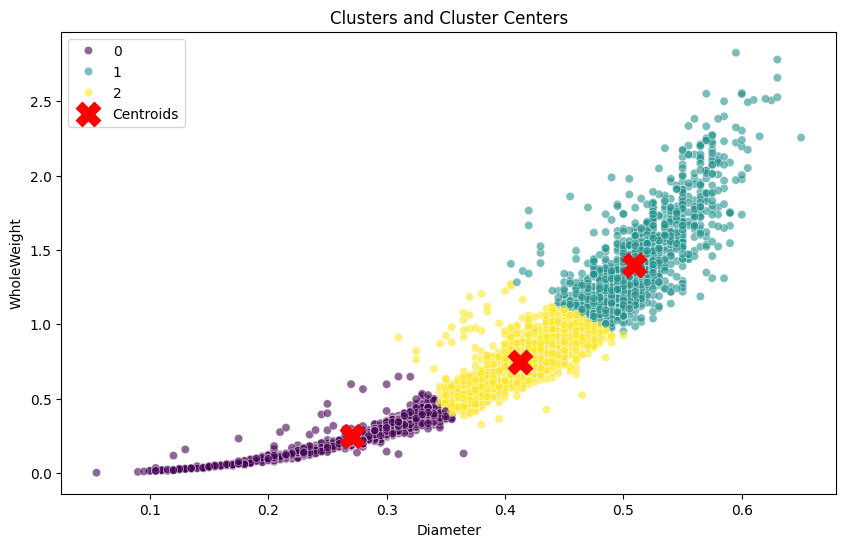

In [216]:
# Add cluster labels to the data
abalone_data['Cluster'] = kmeans.labels_

# Inverse transform the scaled cluster centers for plotting
centers_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize the clusters and the cluster centers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diameter', y='WholeWeight', hue='Cluster', data=abalone_data, palette='viridis', alpha=0.6, marker='o')
plt.scatter(centers_unscaled[:, 0], 
            centers_unscaled[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters and Cluster Centers')
plt.xlabel('Diameter')
plt.ylabel('WholeWeight')
plt.legend()
plt.show()

## Visualize the Dataset according to the `Type` of Abalone 

Focuses on the original type of abalone and shows how different types are distributed across the feature space.

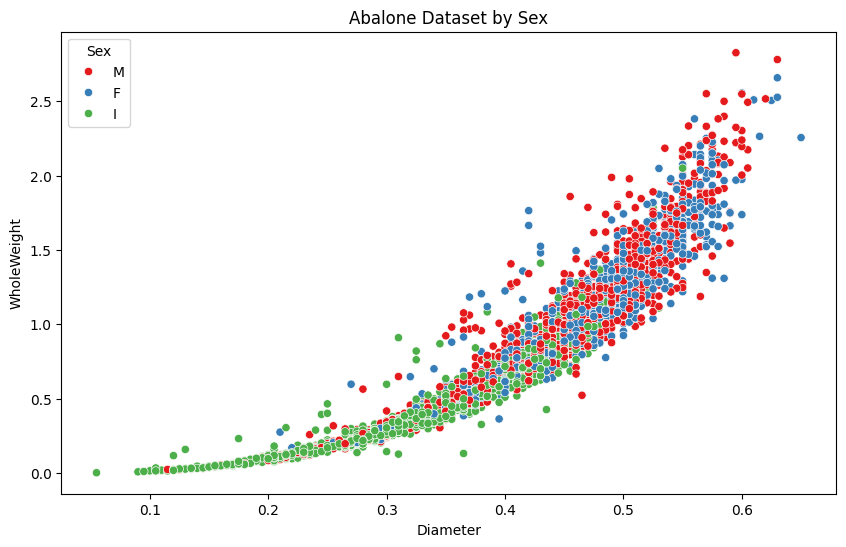

In [217]:
# Reconstruct the 'Sex' column from one-hot encoding
abalone_data['Sex'] = abalone_data[['Sex_M', 'Sex_F', 'Sex_I']].idxmax(axis=1).map({
    'Sex_M': 'M',
    'Sex_F': 'F',
    'Sex_I': 'I'
})

# Now, visualize the dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diameter', y='WholeWeight', hue='Sex', data=abalone_data, palette='Set1')
plt.title('Abalone Dataset by Sex')
plt.xlabel('Diameter')
plt.ylabel('WholeWeight')
plt.legend(title='Sex')
plt.show()

## Conclusion

Data Preparation: 
- The abalone dataset was cleaned and processed, including encoding the Sex variable and standardizing features.

---------------------------

Number of clusters: 3

Cluster centers (scaled):

- Cluster 0: [-1.38, -1.19]  

- Cluster 1: [1.02, 1.16]

- Cluster 2: [0.05, -0.17]

- Inertia: 1612.41

These centers show the average Diameter and WholeWeight for each cluster.

---------------------------

Cluster Visualization: Clusters were plotted showing distinct groups of abalones based on size.

Type Visualization: Plotting by Sex shows that Diameter and WholeWeight do not clearly separate abalones by sex.

---------------------------

Findings:

- K-means clusters reveal size-based groups but do not effectively differentiate abalones by sex.
- Size-based clustering is clear, but sex classification requires additional features.

## Question 2 [20 mark]
For this question, we will use the "Breast Cancer Wisconsin (Original) Data Set," which can be found at [https://j.mp/2NsaIlc](https://j.mp/2NsaIlc). 

### Complete the tasks below:
1. Import the Breast Cancer datasets from 'breast-cancer.data'. The attribute information can be found in 'breast-cancer.names'.
1. Clean and prepare the Breast Cancer datasets, save it as  a CSV file named 'BreasrCancer.csv'.
1. Feature engineering: discuss your approach.
1. Train a kNN model based on the dataset to classify the 'class' (benign or malignant) based on the given attributes.
1. Optimize your kNN model and display the optimum model. 
1. Plot the accuracy of the model parameters. 
1. Graph the confusion matrix and calculate the overall accuracy of the model on the testing data.
1. Discussion: observation/finding.


## Import the Dataset from file

Start by importing necessary libraries and loading the dataset.

In [218]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load dataset
column_names = [
    'id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape',
    'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 
    'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'
]
data = pd.read_csv('breast-cancer.data', names=column_names, na_values='?')

print(data.head(10))

        id  clump_thickness  uniformity_of_cell_size  \
0  1000025                5                        1   
1  1002945                5                        4   
2  1015425                3                        1   
3  1016277                6                        8   
4  1017023                4                        1   
5  1017122                8                       10   
6  1018099                1                        1   
7  1018561                2                        1   
8  1033078                2                        1   
9  1033078                4                        2   

   uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                     

## Clean and Save the Dataset as CSV

Clean the dataset by handling missing values, converting categorical attributes, and saving it as a CSV file.

In [219]:
# Handle missing values
data = data.dropna()

# Save cleaned dataset
data.to_csv('BreastCancer.csv', index=False)

# Verify the cleaned data
data_cleaned = pd.read_csv('BreastCancer.csv')
print("Cleaned Data:")
print(data_cleaned.head())
print("Missing values in 'class' column:")
print(data_cleaned['class'].isna().sum())

Cleaned Data:
        id  clump_thickness  uniformity_of_cell_size  \
0  1000025                5                        1   
1  1002945                5                        4   
2  1015425                3                        1   
3  1016277                6                        8   
4  1017023                4                        1   

   uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   bare_nuclei  bland_chromatin  normal_nucleoli  mitoses  class  
0          1.0                3                1        1      2  
1         10.0                3         

## Prepare the Dataset for Modeling
- Separating features and target variables.
- Splitting the data into training and testing sets.

In [220]:
# Separate features and target variable
X = data.drop(['id', 'class'], axis=1)  # Features
y = data['class']  # Target variable

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature engineering
#### Discuss your approach.

Scaled Data (StandardScaler):
- Standardization scales the data so that each feature has a mean of 0 and a standard deviation of 1. This is especially useful for algorithms like k-NN, SVM, or logistic regression, which are sensitive to the magnitude of features.
After scaling, all features remain, but they are transformed.



In [221]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)          

## kNN: TRAIN MODEL

In [222]:
# Initialize the kNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Optimize the kNN Model and Display the optimum model

In [223]:
# Define parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Optimal parameters
best_k = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_

print(f"Optimal number of neighbors: {best_k}")


Optimal number of neighbors: 11


## Plot the Accuracy for Various Parameters

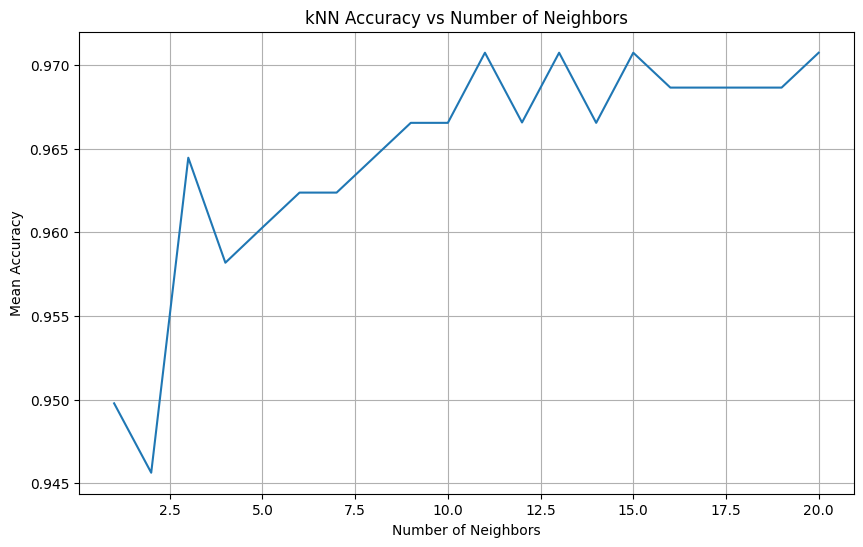

In [224]:
# Accuracy for each parameter value
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=results)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')
plt.title('kNN Accuracy vs Number of Neighbors')
plt.grid(True)
plt.show()

## Graph the confusion matrix and calculate the overall accuracy of the model on the testing data

Accuracy: 0.96


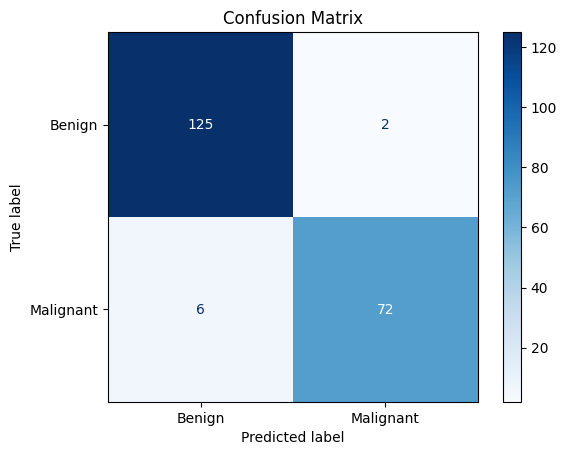

In [225]:
# Make predictions
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Discussion:  Observations and Findings

1. Optimal Number of Neighbors: The best k value found was 11, indicating the model uses 11 neighbors to make predictions.

2. Accuracy: The kNN model achieved an accuracy of 96%, demonstrating strong performance in classifying benign and malignant cases.

3. Confusion Matrix:
- True Positives (Malignant correctly classified): 72
- True Negatives (Benign correctly classified): 125
- False Positives (Benign classified as malignant): 2
- False Negatives (Malignant classified as benign): 6

The model shows high accuracy with few misclassifications, making it reliable for this task.

4. Overall Performance: The kNN model performs well with high accuracy and a favorable confusion matrix, balancing sensitivity and specificity effectively.

## Plagiarism
It is fine to seek help from friends or from online resources when you do the assignment, However,
seeking help should not go overboard, to the point of getting (or even paying) someone to
complete the assignment partly or fully for you, copying from online resources without
understanding, or doing any means with the intention to cheat. 

For this assignment, plagiarism
means the following:
(a) Turning in a work that, from the examiner’s point of view, you do not sufficiently understand.
(b) Turning in someone else’s work (whether partly or fully) as your own.
(c) To use another’s work (whether partly or fully) without crediting the source.
(d) Any means of cheating.

**Plagiarism is a serious offence.**

**We will give ZERO (0) marks to students who plagiarize AND to students who intentionally or
unintentionally help other students to plagiarize by giving all or some of their code.**



## Submit
All submission via EbWise/OneDrive according to your tutorial section (check with your tutor where to submit).

**Name your Lab Exercise file accordingly.** \
Ensure your `.ipynb` file is properly named. Double check all group members' ID, name, and contribution before submission. 

### <font color='red'>Deadline: 15<sup>th</sup> September 2024 (Sunday), 11.59pm.</font>